In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
dataset = pd.read_csv('data/KMeansData.csv')
dataset.shape

(100, 2)

In [12]:
X =dataset.iloc[:, :].values
X[:5]


array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

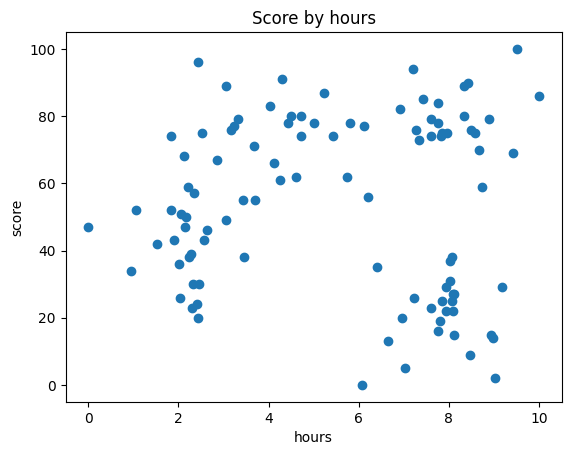

In [13]:
plt.scatter(X[:,0], X[:,1])
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

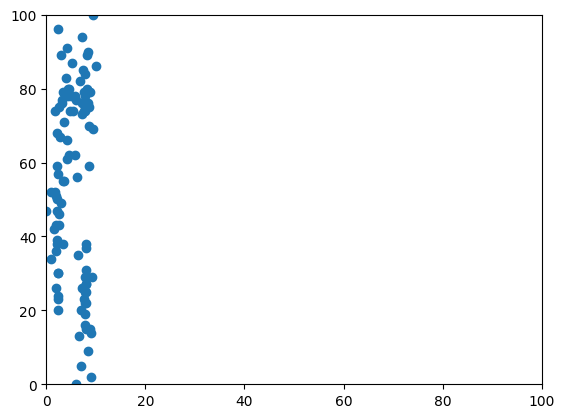

In [14]:
plt.scatter(X[:,0], X[:,1])
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trans = scaler.fit_transform(X)
X_trans[:5], X[:5]

(array([[ 0.68729921,  0.73538376],
        [-0.66687438,  0.04198891],
        [-0.77161709,  0.04198891],
        [-0.9100271 ,  1.35173473],
        [-0.8090252 ,  0.96651537]]),
 array([[ 7.33, 73.  ],
        [ 3.71, 55.  ],
        [ 3.43, 55.  ],
        [ 3.06, 89.  ],
        [ 3.33, 79.  ]]))

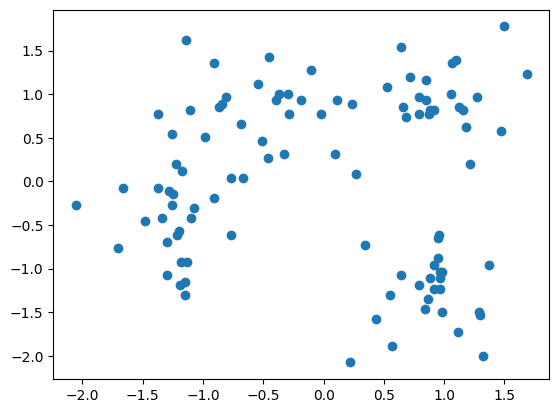

In [16]:
plt.scatter(X_trans[:, 0], X_trans[:, 1])


In [17]:
from sklearn.cluster import KMeans

inertia_list = [] 
for i in range(1, 11, 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_trans)
    inertia_list.append(kmeans.inertia_)

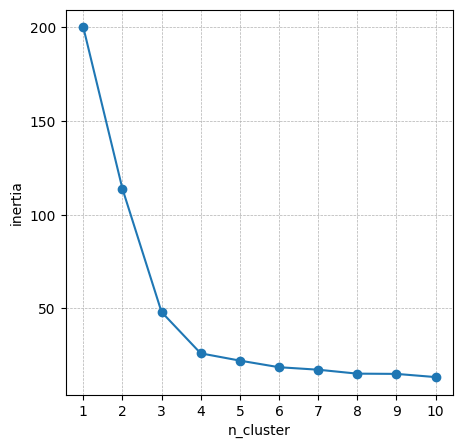

In [18]:
x = list(range(1, 11, 1))
y = inertia_list

plt.figure(figsize=(5,5))
plt.plot(x, y, marker='o')
plt.xticks([x for x in range(1, 11, 1)])
plt.yticks([50, 100, 150, 200])
plt.grid(True, ls='--', lw=0.5)
plt.xlabel('n_cluster')
plt.ylabel('inertia')
plt.show()


In [19]:
K=4
kmeans = KMeans(n_clusters=K,random_state=0)
kmeans.fit(X_trans)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [20]:
y_pred = kmeans.fit_predict(X_trans)
y_pred, X[:5]

(array([1, 0, 3, 0, 0, 2, 2, 0, 1, 0, 0, 3, 2, 3, 3, 0, 2, 1, 3, 0, 2, 0,
        3, 2, 1, 1, 3, 3, 3, 3, 2, 2, 3, 0, 1, 1, 3, 0, 0, 0, 3, 2, 1, 3,
        3, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 3, 2, 2, 1, 1, 1, 1, 2,
        2, 0, 2, 1, 3, 1, 1, 1, 3, 3, 3, 3, 0, 1, 2, 1, 2, 2, 1, 0, 3, 2,
        1, 3, 0, 2, 0, 1, 3, 0, 1, 0, 2, 3], dtype=int32),
 array([[ 7.33, 73.  ],
        [ 3.71, 55.  ],
        [ 3.43, 55.  ],
        [ 3.06, 89.  ],
        [ 3.33, 79.  ]]))

In [21]:
dataset['cluster']=y_pred
dataset.head()

,hour,score,cluster
0,7.33,73,1
1,3.71,55,0
2,3.43,55,3
3,3.06,89,0
4,3.33,79,0


In [22]:
import numpy as np 
index = np.where(y_pred==1)
index


(array([ 0,  8, 17, 24, 25, 34, 35, 42, 45, 50, 61, 62, 63, 64, 69, 71, 72,
        73, 79, 81, 84, 88, 93, 96]),)

In [23]:
filt = dataset['cluster']==0
dataset[filt].index

Index([ 1,  3,  4,  7,  9, 10, 15, 19, 21, 33, 37, 38, 39, 47, 51, 54, 55, 56,
       57, 67, 78, 85, 90, 92, 95, 97],
      dtype='int64')

In [24]:
X[index, 1], X[index, 0]

(array([[ 73.,  59.,  74.,  90.,  77.,  70.,  75.,  85.,  69.,  94.,  89.,
          76.,  82.,  76.,  78.,  75.,  74.,  75., 100.,  80.,  79.,  79.,
          86.,  84.]]),
 array([[ 7.33,  8.73,  7.61,  8.42,  6.12,  8.66,  7.95,  7.42,  9.43,
          7.21,  8.34,  8.5 ,  6.91,  7.26,  7.76,  8.58,  7.83,  7.85,
          9.5 ,  8.33,  7.61,  8.89, 10.  ,  7.76]]))

In [25]:
for i in range(K):
    index = np.where(y_pred==i)
    print(i, X[index, 0], X[index, 1])

0 [[3.71 3.06 3.33 5.74 4.73 5.   4.13 3.67 2.86 4.5  5.43 4.44 3.17 1.83
  2.53 4.61 4.04 4.25 2.44 4.71 4.29 3.24 2.13 5.8  6.21 5.22]] [[55. 89. 79. 62. 74. 78. 66. 71. 67. 80. 74. 78. 76. 74. 75. 62. 83. 61.
  96. 80. 91. 77. 68. 78. 56. 87.]]
1 [[ 7.33  8.73  7.61  8.42  6.12  8.66  7.95  7.42  9.43  7.21  8.34  8.5
   6.91  7.26  7.76  8.58  7.83  7.85  9.5   8.33  7.61  8.89 10.    7.76]] [[ 73.  59.  74.  90.  77.  70.  75.  85.  69.  94.  89.  76.  82.  76.
   78.  75.  74.  75. 100.  80.  79.  79.  86.  84.]]
2 [[7.22 8.12 7.02 9.17 8.47 6.08 8.03 9.02 7.85 7.94 7.6  6.41 7.75 8.08
  7.94 6.96 8.11 8.94 8.08 7.81 8.07 8.06 8.97 8.03 6.65]] [[26. 15.  5. 29.  9.  0. 31.  2. 25. 22. 23. 35. 16. 27. 29. 20. 27. 15.
  22. 19. 25. 38. 14. 37. 13.]]
3 [[3.43 2.63 3.45 3.06 0.94 1.9  0.   2.16 2.24 2.31 2.43 2.03 1.53 2.14
  2.02 2.06 1.05 2.28 2.56 2.35 2.22 2.33 1.83 2.41 2.46]] [[55. 46. 38. 49. 34. 43. 47. 50. 38. 23. 20. 26. 42. 47. 36. 51. 52. 39.
  43. 57. 59. 30. 52. 24. 30.

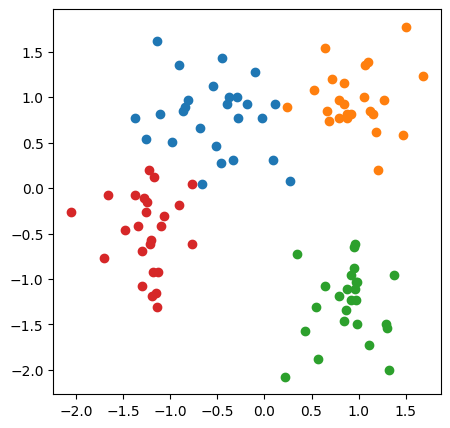

In [26]:
plt.figure(figsize=(5, 5))
for i in range(K):
    index = np.where(y_pred==i)
    x=X_trans[index, 0]
    y=X_trans[index, 1]
    plt.scatter(x, y)
plt.show()

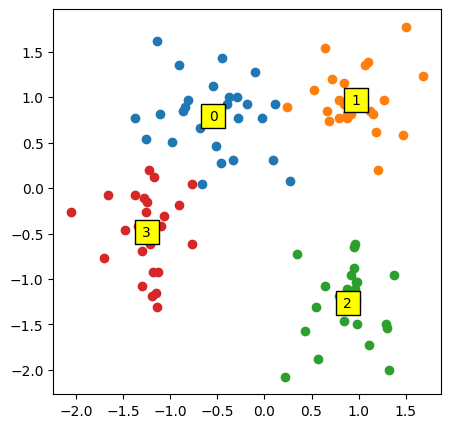

In [27]:
centers = kmeans.cluster_centers_
plt.figure(figsize=(5, 5))
for i in range(K):
    index = np.where(y_pred==i)
    x=X_trans[index, 0]
    y=X_trans[index, 1]
    plt.scatter(x, y)
    cx = centers[i, 0]
    cy = centers[i, 1]
    plt.scatter(cx, cy, c='yellow', s=300, ec='black', marker='s')
    plt.text(cx, cy, i, ha='center', va='center')
plt.show()

In [28]:
X_org = scaler.inverse_transform(X_trans)
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [29]:
centers_org = scaler.inverse_transform(centers)
centers_org

array([[ 4.04115385, 74.5       ],
       [ 8.08333333, 79.125     ],
       [ 7.8552    , 20.96      ],
       [ 2.1528    , 41.24      ]])

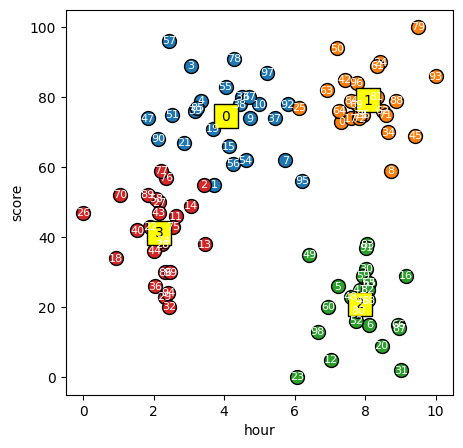

In [30]:
plt.figure(figsize=(5, 5))
for i in range(K):
    index = np.where(y_pred==i)
    x=X_org[index, 0]
    y=X_org[index, 1]
    plt.scatter(x, y, s=100, ec='black')
    cx = centers_org[i, 0]
    cy = centers_org[i, 1]
    plt.scatter(cx, cy, c='yellow', s=300, ec='black', marker='s')
    plt.text(cx, cy, i, ha='center', va='center')
    plt.xlabel('hour')
    plt.ylabel('score')
for idx, x in enumerate(X_org):
    plt.text(x[0], x[1], idx, ha='center', va='center', color='white', size=8)
plt.show()

In [31]:
dataset.loc[31, :]

hour       9.02
score      2.00
cluster    2.00
Name: 31, dtype: float64

In [32]:
#KMeans 모델생성
def model_kmeans(K):
    import pandas as pd
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=K, random_state=0)

    dataset = pd.read_csv('data/KMeansData.csv')
    X = dataset.iloc[:, [0,1]].values

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_trans = scaler.fit_transform(X)
    
    kmeans.fit(X_trans)
    
    X_org = scaler.inverse_transform(X_trans)
    centers_org = scaler.inverse_transform(kmeans.cluster_centers_)
    
    return kmeans, X_org, X_trans, centers_org

In [33]:

kmenas, X_org, X_trans, centers_org = model_kmeans(5) 
y_pred = kmeans.fit_predict(X_trans)
y_pred

array([1, 0, 3, 0, 0, 2, 2, 0, 1, 0, 0, 3, 2, 3, 3, 0, 2, 1, 3, 0, 2, 0,
       3, 2, 1, 1, 3, 3, 3, 3, 2, 2, 3, 0, 1, 1, 3, 0, 0, 0, 3, 2, 1, 3,
       3, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 3, 2, 2, 1, 1, 1, 1, 2,
       2, 0, 2, 1, 3, 1, 1, 1, 3, 3, 3, 3, 0, 1, 2, 1, 2, 2, 1, 0, 3, 2,
       1, 3, 0, 2, 0, 1, 3, 0, 1, 0, 2, 3], dtype=int32)

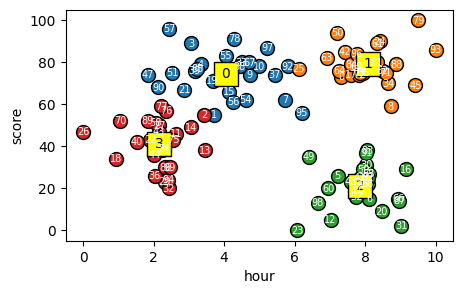

In [46]:


import matplotlib.pyplot as plt
import numpy as np
no =4
kmeans, X_org, X_trans, centers_org = model_kmeans(no)
y_pred = kmeans.fit_predict(X_trans)
plt.figure(figsize=(5, 3))
for i in range(no):
    index = np.where(y_pred == i)
    x = X_org[index, 0]
    y = X_org[index, 1]
    plt.scatter(x, y, s=100, ec='black')

    cx = centers_org[i, 0]
    cy = centers_org[i, 1]
    plt.scatter(cx, cy, c='yellow', s=300, ec='black', marker='s')

    plt.text(cx, cy, str(i), ha='center', va='center')

plt.xlabel('hour')
plt.ylabel('score')

for idx, x in enumerate(X_org):
    plt.text(x[0], x[1], str(idx), ha='center', va='center', color='white', size=7)

plt.show()


In [35]:
df_stu = pd.read_csv('data/학사관리/학생.csv')
df_stu.head()

,학생번호,학생이름,학생학과,학년,생년월일,지도교수
0,92414029,서연우,전산,3,73/10/06,228
1,92414033,김창덕,전산,4,73/10/26,221
2,92514009,이지행,전자,4,73/11/16,311
3,92514023,김형명,전자,4,73/08/29,311
4,92454018,이원구,건축,3,74/09/30,509


In [36]:
df_pro = pd.read_csv('data/학사관리/교수.csv')


In [37]:
stu = list(df_stu['학생이름'])
pro = list(df_pro['교수이름'])
names = stu + pro
print(names)

['서연우', '김창덕', '이지행', '김형명', '이원구', '이재영', '박혜경', '김수정', '황황황', '이병렬', '이재광', '강승일', '오문환']


In [38]:
df = pd.read_csv('data/KMeansData.csv')
df['name']= ''
df.head(2)

,hour,score,name
0,7.33,73,
1,3.71,55,


In [39]:
import random
idx = random.randint(0, len(names)-1)
idx, names[idx]

(4, '이원구')

In [40]:
for i in range(len(df)):
    import random
    idx = random.randint(0, len(names)-1)
    df.loc[i, 'name']=names[idx]
df.tail()

,hour,score,name
95,6.21,56,황황황
96,7.76,84,황황황
97,5.22,87,김형명
98,6.65,13,이병렬
99,2.46,30,이재광


In [41]:
kmeans, X, X_trans, centers_org = model_kmeans(4)
y_pred = kmeans.fit_predict(X_trans)
df['cluster'] = y_pred
df.tail()

,hour,score,name,cluster
95,6.21,56,황황황,0
96,7.76,84,황황황,1
97,5.22,87,김형명,0
98,6.65,13,이병렬,2
99,2.46,30,이재광,3


In [42]:
for i in range(4):
    filt = df['cluster']==i
    df2 = df[filt]
    print(f'{i}그룹 {len(df2)}명....................')
    index = df2.index
    count = 0
    for idx in index:
        print(f'{idx}:{df.loc[idx, "name"]}', end=',')
        count +=1
        if count%10==0: print()
    print()

0그룹 26명....................
1:이재영,3:김창덕,4:이지행,7:김창덕,9:오문환,10:이재광,15:이재영,19:박혜경,21:이재영,33:서연우,
37:이원구,38:김창덕,39:박혜경,47:이병렬,51:이재광,54:김수정,55:김형명,56:오문환,57:박혜경,67:이지행,
78:이병렬,85:이병렬,90:박혜경,92:서연우,95:황황황,97:김형명,
1그룹 24명....................
0:이지행,8:박혜경,17:김형명,24:오문환,25:이병렬,34:서연우,35:오문환,42:이재영,45:이병렬,50:이재광,
61:이병렬,62:오문환,63:김수정,64:서연우,69:김형명,71:김수정,72:박혜경,73:박혜경,79:강승일,81:김창덕,
84:이병렬,88:서연우,93:오문환,96:황황황,
2그룹 25명....................
5:이병렬,6:이재영,12:서연우,16:이재영,20:오문환,23:이지행,30:이원구,31:황황황,41:강승일,46:이원구,
48:서연우,49:김형명,52:김수정,53:오문환,59:김형명,60:강승일,65:이원구,66:김수정,68:이원구,80:오문환,
82:김형명,83:이지행,87:이원구,91:박혜경,98:이병렬,
3그룹 25명....................
2:강승일,11:오문환,13:강승일,14:황황황,18:김형명,22:박혜경,26:이재영,27:서연우,28:강승일,29:오문환,
32:이원구,36:이원구,40:이재광,43:서연우,44:김수정,58:김창덕,70:서연우,74:박혜경,75:김창덕,76:김수정,
77:이재광,86:서연우,89:박혜경,94:황황황,99:이재광,


In [43]:
def model_kmeans(K):
    import pandas as pd
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=K, random_state=0)

    dataset = pd.read_csv('data/KMeansData.csv')
    X = dataset.iloc[:, [0,1]].values

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_trans = scaler.fit_transform(X)
    
    kmeans.fit(X_trans)
    
    X_org = scaler.inverse_transform(X_trans)
    centers_org = scaler.inverse_transform(kmeans.cluster_centers_)
    return kmeans, X_org, X_trans, centers_org

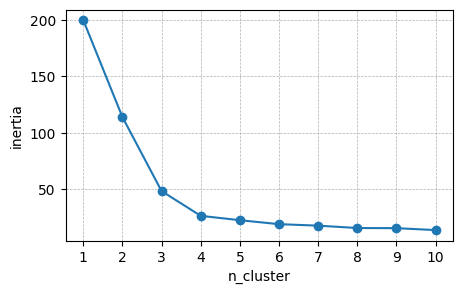

In [44]:
inertia_list = [] 
for i in range(1, 11, 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_trans)
    inertia_list.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
x = list(range(1, 11, 1))
y = inertia_list

plt.figure(figsize=(5,3))
plt.plot(x, y, marker='o')
plt.xticks([x for x in range(1, 11, 1)])
plt.yticks([50, 100, 150, 200])
plt.grid(True, ls='--', lw=0.5)
plt.xlabel('n_cluster')
plt.ylabel('inertia')
plt.show()